# Incremental

In [4]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

In [5]:
def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt' and 'nalyers1' in file and 'acc' in file and 'nhid25' in file:
                L.append(os.path.join(file))
    return L
file_name('../data/hwdb_classIL_sgd_nhid2000_lr0005')

[]

## MNIST

### SNN

naca 10 0.6005560100078583 0.04448856022591709
(1.16, 0.2727636339397171)
sgd 10 0.10258600115776062 0.0010184952642827351
(8.48, 0.511468474101777)
ewc 10 0.10009000450372696 0.00018575359500893485
(4.62, 0.23151673805580458)


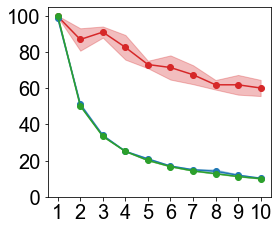

In [277]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline


class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial'] 

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\mnist_classIL_edfsnn_naca_snn_mnist'
mnist_naca_snn_acc = plot(path, file_name_3(path),'naca','C3')
mnist_naca_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mnist_classIL_sgdsnn_sgd_snn_mnist'
mnist_sgd_snn_acc = plot(path, file_name_3(path),'sgd','C0')
mnist_sgd_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mnist_classIL_ewcsnn_ewc_snn_mnist'
mnist_ewc_snn_acc = plot(path, file_name_3(path),'ewc','C2')
mnist_ewc_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/snn_increment_mnist2.svg')
plt.show()

### ANN

naca 10 0.7917660117149353 0.0377710188539404
(1.32, 0.24819347291981714)
sgd 10 0.0999099999666214 7.802572007542332e-05
(1.9, 0.06324555320336757)
ewc 10 0.10032200068235397 0.00040134182052945335
(1.0, 0.0)


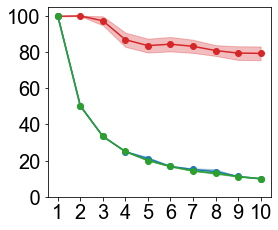

In [278]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]

def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\mnist_classIL_edf_naca_ann_mnist'
mnist_naca_ann_acc = plot(path, file_name_3(path),'naca','C3')
mnist_naca_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mnist_classIL_sgd_sgd_ann_mnist'
mnist_sgd_ann_acc = plot(path, file_name_3(path),'sgd','C0')
mnist_sgd_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mnist_classIL_ewc_ewc_ann_mnist'
mnist_ewc_ann_acc = plot(path, file_name_3(path),'ewc','C2')
mnist_ewc_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/ann_increment_mnist2.svg')
plt.show()

## Cifar10

### SNN

naca 10 0.4019000053405762 0.03598234814043266
(1.4600000000000002, 0.4841487374764082)
sgd 10 0.10000000149011612 0.0
(1.0, 0.0)
ewc 10 0.10000000149011612 0.0
(1.0, 0.0)


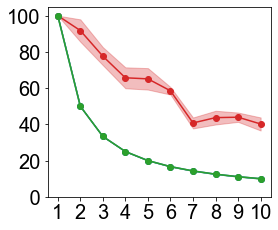

In [279]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\cifar_classIL_edfsnn_naca_snn_cifar'
cifar_naca_snn_acc = plot(path, file_name_3(path),'naca','C3')
cifar_naca_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\cifar_classIL_sgdsnn_sgd_snn_cifar'
cifar_sgd_snn_acc = plot(path, file_name_3(path),'sgd','C0')
cifar_sgd_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\cifar_classIL_ewcsnn_ewc_snn_cifar'
cifar_ewc_snn_acc = plot(path, file_name_3(path),'ewc','C2')
cifar_ewc_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/snn_increment_cifar2.svg')
plt.show()

### ANN

naca 10 0.6083799958229065 0.026047831879797055
(1.1800000000000002, 0.13266499161421597)
sgd 10 0.10000000149011612 0.0
(1.0, 0.0)
ewc 10 0.10000000149011612 0.0
(1.0, 0.0)


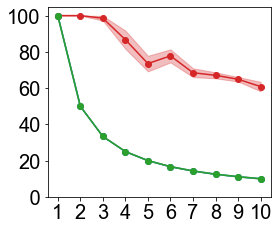

In [280]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline


class Get_name():
    def __init__(self, sheet): 
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                # L.append(os.path.join(root, file))
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\cifar_classIL_edf_naca_ann_cifar'
cifar_naca_ann_acc = plot(path, file_name_3(path),'naca','C3')
cifar_naca_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\cifar_classIL_sgd_sgd_ann_cifar'
cifar_sgd_ann_acc = plot(path, file_name_3(path),'sgd','C0')
cifar_sgd_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\cifar_classIL_ewc_ewc_ann_cifar'
cifar_ewc_ann_acc = plot(path, file_name_3(path),'ewc','C2')
cifar_ewc_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/ann_increment_cifar2.svg')
plt.show()

## dvsgesture

### SNN

naca 11 0.36439454555511475 0.008596923760753699
(1.7272727272727273, 0.6994685113335034)
sgd 11 0.09090909361839294 0.0
(1.0, 0.0)
ewc 11 0.09090909361839294 0.0
(1.0, 0.0)


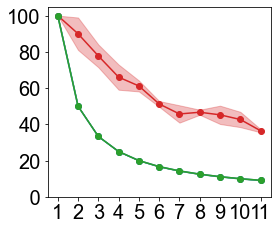

In [281]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline


class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\gesture_classIL_edfsnn_naca_snn_gesture'
gesture_naca_snn_acc = plot(path, file_name_3(path),'naca','C3')
gesture_naca_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\gesture_classIL_sgdsnn_sgd_snn_gesture'
gesture_sgd_snn_acc = plot(path, file_name_3(path),'sgd','C0')
gesture_sgd_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\gesture_classIL_ewcsnn_ewc_snn_gesture'
gesture_ewc_snn_acc = plot(path, file_name_3(path),'ewc','C2')
gesture_ewc_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
task=11
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/snn_increment_gesture.svg')
plt.show()

### ANN

naca 11 0.46022728085517883 0.010899614782231306
(1.309090909090909, 0.15850541612875174)
sgd 11 0.09090909361839294 0.0
(1.0, 0.0)
ewc 11 0.09090909361839294 0.0
(1.0, 0.0)


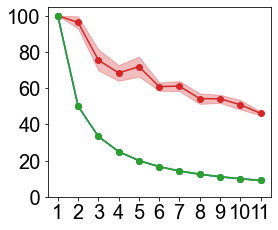

In [282]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                # L.append(os.path.join(root, file))
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial'] 

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\gesture_classIL_edf_naca_ann_gesture'
gesture_naca_ann_acc = plot(path, file_name_3(path),'naca','C3')
gesture_naca_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\gesture_classIL_sgd_sgd_ann_gesture'
gesture_sgd_ann_acc = plot(path, file_name_3(path),'sgd','C0')
gesture_sgd_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\gesture_classIL_ewc_ewc_ann_gesture'
gesture_ewc_ann_acc = plot(path, file_name_3(path),'ewc','C2')
gesture_ewc_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
task=11
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/ann_increment_gesture.svg')
plt.show()

## letters

### SNN

naca 26 0.3639684796333313 0.03689070009191717
(1.0, 0.0)
sgd 26 0.040679232031106946 0.0014724024768024487
(8.8, 1.4696938456699067)
ewc 26 0.040886154770851134 0.001511888085359499
(8.8, 1.4696938456699067)


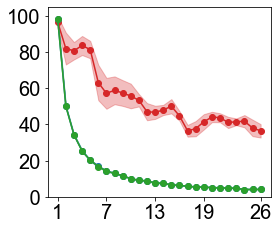

In [283]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline


class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial'] 

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\letters_classIL_edfsnn_naca_snn_letters'
letters_naca_snn_acc = plot(path, file_name_3(path),'naca','C3')
letters_naca_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\letters_classIL_sgdsnn_sgd_snn_letters'
letters_sgd_snn_acc = plot(path, file_name_3(path),'sgd','C0')
letters_sgd_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\letters_classIL_ewcsnn_ewc_snn_letters'
letters_ewc_snn_acc = plot(path, file_name_3(path),'ewc','C2')
letters_ewc_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks([0,6,12,18,25],[1,7,13,19,26], fontsize=20)
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/snn_increment_alphabet2.svg')
plt.show()

### ANN

naca 26 0.5517622828483582 0.015825728099017864
(1.2, 0.4000000000000001)
sgd 26 0.0450307697057724 0.0035690346665826784
(8.2, 5.979966555090421)
ewc 26 0.04874846115708351 0.005570214314904777
(1.6, 0.8)


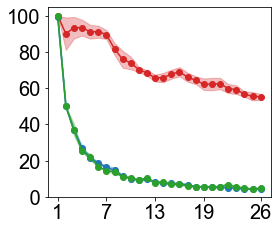

In [284]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\letters_classIL_edf_naca_ann_alphabet'
letters_naca_ann_acc = plot(path, file_name_3(path),'naca','C3')
letters_naca_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\letters_classIL_sgd_naca_ann_alphabet'
letters_sgd_ann_acc = plot(path, file_name_3(path),'sgd','C0')
letters_sgd_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\letters_classIL_ewc_naca_ann_alphabet'
letters_ewc_ann_acc = plot(path, file_name_3(path),'ewc','C2')
letters_ewc_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks([0,6,12,18,25],[1,7,13,19,26], fontsize=20)
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/ann_increment_alphabet2.svg')
plt.show()

## mathgreek

### SNN

naca 46 0.40510687232017517 0.027572635354275954
(1.3333333333333333, 0.47140452079103173)
sgd 46 0.021591304615139962 0.0002139064996361574
(14.6, 5.083306010855534)
ewc 46 0.02166086956858635 0.00034603579172151
(14.4, 5.0039984012787215)


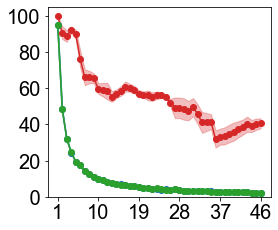

In [321]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline


class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\mathgreek_classIL_edfsnn_naca_snn_mathgreek_3'
mathgreek_naca_snn_acc = plot(path, file_name_3(path),'naca','C3')
mathgreek_naca_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mathgreek_classIL_sgdsnn_sgd_snn_mathgreek_3'
mathgreek_sgd_snn_acc = plot(path, file_name_3(path),'sgd','C0')
mathgreek_sgd_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mathgreek_classIL_ewcsnn_ewc_snn_mathgreek_3'
mathgreek_ewc_snn_acc = plot(path, file_name_3(path),'ewc','C2')
mathgreek_ewc_snn_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks([0,9,18,27,36,45],[1,10,19,28,37,46], fontsize=20)
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/snn_increment_mathgreek2.svg')
plt.show()

### ANN

naca 46 0.5467360734939575 0.02014418361065821
(1.8, 0.7483314773547883)
sgd 46 0.022635652497410775 0.0006036414451276725
(8.0, 3.1622776601683795)
ewc 46 0.02681695744395256 0.0016365456351516506
(11.6, 4.454211490264018)


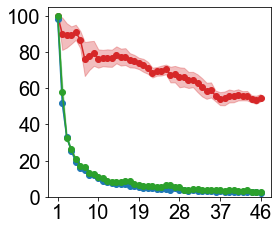

In [286]:
# ANN
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline


class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label, color='C0'):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)

    plt.plot(output.mean(0), label=label, color=color, marker='o')
    lambda_std = 1/np.sqrt(output.shape[0])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), 
                     (output.mean(0) + lambda_std * output.std(0)), alpha=.3, color=color)
    global task
    task = output.shape[1]
    return output.mean(0)[-1], lambda_std*output.std(0)[-1]
    
def cost(root, name, *args):
    cost = []
    for i in range(len(name)):
        file = open(os.path.join(root, name[i]), 'r').readlines()[0]
        mean = file.split(', ')[-2].split(', ')[0]
        std = file.split(', ')[-1].split(']')[0]
        cost.append(float(mean))
    return np.array(cost).mean(), np.array(cost).std()

plt.figure( figsize=(4,3.5) )

def file_name_3(file_dir, xx = 'acc'):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if xx in os.path.splitext(file)[0] and 'txt' in os.path.splitext(file)[1]:
                L.append(file)
    return L

path = 'D:\\code\\EAST\\data\\new\\mathgreek_classIL_edf_naca_ann_mathgreek_3_2'
mathgreek_naca_ann_acc = plot(path, file_name_3(path),'naca','C3')
mathgreek_naca_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mathgreek_classIL_sgd_sgd_ann_mathgreek_3_2'
mathgreek_sgd_ann_acc = plot(path, file_name_3(path),'sgd','C0')
mathgreek_sgd_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

path = 'D:\\code\\EAST\\data\\new\\mathgreek_classIL_ewc_ewc_ann_mathgreek_3_2'
mathgreek_ewc_ann_acc = plot(path, file_name_3(path),'ewc','C2')
mathgreek_ewc_ann_cost = cost(path, file_name_3(path, 'cost'))
print(cost(path, file_name_3(path, 'cost')))

n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xticks([0,9,18,27,36,45],[1,10,19,28,37,46], fontsize=20)
plt.ylim([0,1.05])
plt.savefig('C:\code\EDF图\incremental/ann_increment_mathgreek2.svg')
plt.show()

# Computational cost

## MNIST

### SNN

[1588000 9528000  794000]
[[1.02586001e+01 1.00090005e+01 6.00556010e+01]
 [1.01849526e-01 1.85753595e-02 4.44885602e+00]]


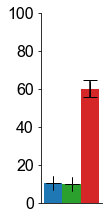

[[13.46624    44.01936     0.92104   ]
 [ 0.25684397  0.69756413  0.06848682]]


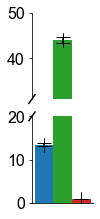

In [305]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd

m, n, k = 784, 1000, 10
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+10*(m*n+n*k),
            m*n + n*k,
#             m*n+n*k+k*n+n*m
                ])
print(cost)
mnist_sgd_snn = np.array(mnist_sgd_snn_cost) * np.array([1, 1/np.sqrt(10)])
mnist_ewc_snn = np.array(mnist_ewc_snn_cost) * np.array([1, 1/np.sqrt(10)])
mnist_edf_snn = np.array(mnist_naca_snn_cost) * np.array([1, 1/np.sqrt(10)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[mnist_sgd_snn_acc[0], mnist_ewc_snn_acc[0], mnist_naca_snn_acc[0]],
          [mnist_sgd_snn_acc[1], mnist_ewc_snn_acc[1], mnist_naca_snn_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.3, 0-0.1, 0+0.1], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
def to_percent(temp, position):
    return '%1.0f'%(1*temp) + '%'
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
plt.ylim(0,100)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('MNIST_snn_增量学习能耗_1.svg')
plt.show()

plt.rcParams['font.size'] = 16
fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((- d, + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((- d, + d), (1 - d, 1 + d), **kwargs)
x = np.array([[mnist_sgd_snn[0], mnist_ewc_snn[0], mnist_edf_snn[0]],
          [mnist_sgd_snn[1], mnist_ewc_snn[1], mnist_edf_snn[1]]])* cost/1e6
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([31,50])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,20])
plt.xticks(())

# plt.legend()
plt.savefig('MNIST_snn_增量学习能耗_2.svg')
plt.show()

### ANN

[[9.99100000e+00 1.00322001e+01 7.91766012e+01]
 [7.80257201e-03 4.01341821e-02 3.77710189e+00]]


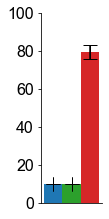

[[3.0172     9.528      1.04808   ]
 [0.03176    0.         0.06231762]]


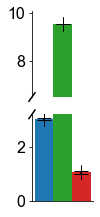

In [306]:
import numpy as np

m, n, k = 784, 1000, 10
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+10*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
#             m*n+n*k+k*n+n*m
                ])

mnist_sgd_ann = np.array(mnist_sgd_ann_cost) * np.array([1, 1/np.sqrt(10)])
mnist_ewc_ann = np.array(mnist_ewc_ann_cost) * np.array([1, 1/np.sqrt(10)])
mnist_edf_ann = np.array(mnist_naca_ann_cost) * np.array([1, 1/np.sqrt(10)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[mnist_sgd_ann_acc[0], mnist_ewc_ann_acc[0], mnist_naca_ann_acc[0]],
          [mnist_sgd_ann_acc[1], mnist_ewc_ann_acc[1], mnist_naca_ann_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.3, 0-0.1, 0+0.1], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
plt.ylim(0,100)
# plt.legend()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('MNIST_ann_增量学习能耗_1.svg')
plt.show()

plt.rcParams.update({'font.size': 16})
fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
# ax2.yaxis.tick_right()
ax2.xaxis.tick_top()
# ax3.yaxis.tick_right()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, d), (-d, +d), **kwargs)  
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((-d, d), (1 - d, 1 + d), **kwargs)
x = np.array([[mnist_sgd_ann[0], mnist_ewc_ann[0], mnist_edf_ann[0]],
          [mnist_sgd_ann[1], mnist_ewc_ann[1], mnist_edf_ann[1]]]) * cost/1e6
print(x)
# x = np.log(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([6.5,10.1])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,3.2])
plt.xticks(())

# plt.legend()
plt.savefig('MNIST_ann_增量学习能耗_2.svg')
plt.show()

## Cifar10

### SNN

[[10.00000015 10.00000015 40.19000053]
 [ 0.          0.          3.59823481]]


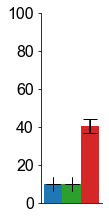

[[ 2.4656     14.7936      1.799888  ]
 [ 0.          0.          0.18874325]]


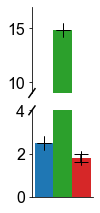

In [307]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd

m, n, k = 3*32*32, 4000, 10
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+10*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
                ])

# ANN mean std
cifar10_BP = np.array(cifar_sgd_ann_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_EWC = np.array(cifar_ewc_ann_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_NACA = np.array(cifar_naca_ann_cost) * np.array([1, 1/np.sqrt(10)])
# SNN mean std
cifar10_SNU_snn = np.array(cifar_sgd_snn_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_EWC_snn = np.array(cifar_ewc_snn_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_NACA_snn = np.array(cifar_naca_snn_cost) * np.array([1, 1/np.sqrt(10)])

plt.rcParams['font.size'] = 16
fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[cifar_sgd_snn_acc[0], cifar_ewc_snn_acc[0], cifar_naca_snn_acc[0]],
          [cifar_sgd_snn_acc[1], cifar_ewc_snn_acc[1], cifar_naca_snn_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.3, 0-0.1, 0+0.1], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax1.set_ylim([0, 100])
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
# plt.legend()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('Cifar10_snn_增量学习能耗_1.svg')
plt.show()

fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
plt.rcParams['font.size'] = 16
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
d = .05  
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs)  
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)
x = np.array([[cifar10_SNU_snn[0], cifar10_EWC_snn[0], cifar10_NACA_snn[0]],
          [cifar10_SNU_snn[1], cifar10_EWC_snn[1], cifar10_NACA_snn[1]]]) * cost /1e7
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([9,17])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,4])
plt.xticks(())

# plt.legend()
plt.savefig('Cifar10_snn_增量学习能耗_2.svg')
plt.show()

### ANN

[[10.00000015 10.00000015 60.83799958]
 [ 0.          0.          2.60478319]]


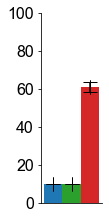

[[ 2.4656     14.7936      1.454704  ]
 [ 0.          0.          0.05171886]]


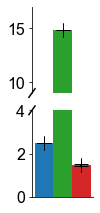

In [308]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd

m, n, k = 3*32*32, 4000, 10
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+10*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
                ])

# ANN mean std
cifar10_BP = np.array(cifar_sgd_ann_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_EWC = np.array(cifar_ewc_ann_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_NACA = np.array(cifar_naca_ann_cost) * np.array([1, 1/np.sqrt(10)])
# SNN mean std
cifar10_SNU_snn = np.array(cifar_sgd_snn_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_EWC_snn = np.array(cifar_ewc_snn_cost) * np.array([1, 1/np.sqrt(10)])
cifar10_NACA_snn = np.array(cifar_naca_snn_cost) * np.array([1, 1/np.sqrt(10)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[cifar_sgd_ann_acc[0], cifar_ewc_ann_acc[0], cifar_naca_ann_acc[0]],
          [cifar_sgd_ann_acc[1], cifar_ewc_ann_acc[1], cifar_naca_ann_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.3, 0-0.1, 0+0.1], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax1.set_ylim([0, 100])
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
# plt.legend()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('Cifar10_ann_增量学习能耗_1.svg')
plt.show()

fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
plt.rcParams['font.size'] = 16
# ax2.yaxis.tick_right()
ax2.xaxis.tick_top()
# ax3.yaxis.tick_right()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs) 
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)
x = np.array([[cifar10_BP[0], cifar10_EWC[0], cifar10_NACA[0]],
          [cifar10_BP[1], cifar10_EWC[1], cifar10_NACA[1]]]) * cost /1e7
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([9,17])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,4])
plt.xticks(())

plt.savefig('Cifar10_ann_增量学习能耗_2.svg')
plt.show()

## DvsGesture

### SNN

[[ 9.09090936  9.09090936 36.43945456]
 [ 0.          0.          3.59823481]]


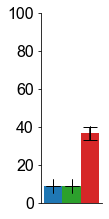

[[ 1.6088     10.4572      1.38941818]
 [ 0.          0.          0.1696461 ]]


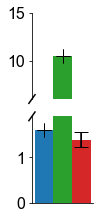

In [309]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd

m, n, k = 2000, 4000, 11
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+11*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
                ])

# ANN mean std
gesture_BP = np.array(gesture_sgd_ann_cost) * np.array([1, 1/np.sqrt(11)])
gesture_EWC = np.array(gesture_ewc_ann_cost) * np.array([1, 1/np.sqrt(11)])
gesture_NACA = np.array(gesture_naca_ann_cost) * np.array([1, 1/np.sqrt(11)])
# SNN mean std
gesture_SNU_snn = np.array(gesture_sgd_snn_cost) * np.array([1, 1/np.sqrt(11)])
gesture_EWC_snn = np.array(gesture_ewc_snn_cost) * np.array([1, 1/np.sqrt(11)])
gesture_NACA_snn = np.array(gesture_naca_snn_cost) * np.array([1, 1/np.sqrt(11)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[gesture_sgd_snn_acc[0], gesture_ewc_snn_acc[0], gesture_naca_snn_acc[0]],
          [gesture_sgd_snn_acc[1], gesture_ewc_snn_acc[1], cifar_naca_snn_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.3, 0-0.1, 0+0.1], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax1.set_ylim([0, 100])
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('DvsGesture_snn_增量学习能耗_1.svg')
plt.show()

plt.rcParams['font.size'] = 16
fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
d = .05
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs) 
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)
x = np.array([[gesture_SNU_snn[0], gesture_EWC_snn[0], gesture_NACA_snn[0]],
          [gesture_SNU_snn[1], gesture_EWC_snn[1], gesture_NACA_snn[1]]]) * cost /1e7
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([6,15])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,1.9])
plt.xticks(())

# plt.legend()
plt.savefig('DvsGesture_snn_增量学习能耗_2.svg')
plt.show()

### ANN

[[ 9.09090936  9.09090936 46.02272809]
 [ 0.          0.          2.60478319]]


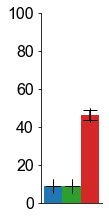

[[ 1.6088     10.4572      1.05303273]
 [ 0.          0.          0.03844323]]


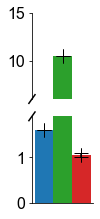

In [310]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd

m, n, k = 2000, 4000, 11
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+11*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
#             m*n+n*k+k*n+n*m
                ])

# ANN mean std
gesture_BP = np.array(gesture_sgd_ann_cost) * np.array([1, 1/np.sqrt(11)])
gesture_EWC = np.array(gesture_ewc_ann_cost) * np.array([1, 1/np.sqrt(11)])
gesture_NACA = np.array(gesture_naca_ann_cost) * np.array([1, 1/np.sqrt(11)])
# SNN mean std
gesture_SNU_snn = np.array(gesture_sgd_snn_cost) * np.array([1, 1/np.sqrt(11)])
gesture_EWC_snn = np.array(gesture_ewc_snn_cost) * np.array([1, 1/np.sqrt(11)])
gesture_NACA_snn = np.array(gesture_naca_snn_cost) * np.array([1, 1/np.sqrt(11)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[gesture_sgd_ann_acc[0], gesture_ewc_ann_acc[0], gesture_naca_ann_acc[0]],
          [gesture_sgd_ann_acc[1], gesture_ewc_ann_acc[1], cifar_naca_ann_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.3, 0-0.1, 0+0.1], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax1.set_ylim([0, 100])
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('DvsGesture_ann_增量学习能耗_1.svg')
plt.show()

fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
plt.rcParams['font.size'] = 16
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs) 
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)
x = np.array([[gesture_BP[0], gesture_EWC[0], gesture_NACA[0]],
          [gesture_BP[1], gesture_EWC[1], gesture_NACA[1]]]) * cost /1e7
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([6,15])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,1.9])
plt.xticks(())

# plt.legend()
plt.savefig('DvsGesture_ann_增量学习能耗_2.svg')
plt.show()

## alphabeta

### SNN

[[ 4.0679232   4.08861548 36.39684796]
 [ 0.14724025  0.15118881  3.68907001]]


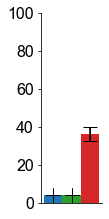

[[ 1.4256     19.9584      0.081     ]
 [ 0.04669337  0.65370718  0.        ]]


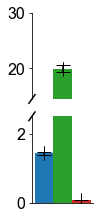

In [311]:
import numpy as np

m, n, k = 784, 1000, 26
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m++26*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
                ])

letters_sgd_snn = np.array(letters_sgd_snn_cost) * np.array([1, 1/np.sqrt(26)])
letters_ewc_snn = np.array(letters_ewc_snn_cost) * np.array([1, 1/np.sqrt(26)])
letters_edf_snn = np.array(letters_naca_snn_cost) * np.array([1, 1/np.sqrt(26)])

letters_sgd_ann = np.array(letters_sgd_ann_cost) * np.array([1, 1/np.sqrt(26)])
letters_ewc_ann = np.array(letters_ewc_ann_cost) * np.array([1, 1/np.sqrt(26)])
letters_edf_ann = np.array(letters_naca_ann_cost) * np.array([1, 1/np.sqrt(26)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[letters_sgd_snn_acc[0], letters_ewc_snn_acc[0], letters_naca_snn_acc[0]],
          [letters_sgd_snn_acc[1], letters_ewc_snn_acc[1], letters_naca_snn_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.2, 0, 0+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
plt.ylim(0,100)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('letters_snn_增量学习能耗_1.svg')
plt.show()

fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
plt.rcParams['font.size'] = 16
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs)  
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)
x = np.array([[letters_sgd_snn[0], letters_ewc_snn[0], letters_edf_snn[0]],
          [letters_sgd_snn[1], letters_ewc_snn[1], letters_edf_snn[1]]]) * cost /1e7
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([14.5,30])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,2.5])
plt.xticks(())

plt.savefig('letters_snn_增量学习能耗_2.svg')
plt.show()

### ANN

[[ 4.50307697  4.87484612 55.17622828]
 [ 0.35690347  0.55702143  1.58257281]]
[[13.284      36.288       0.972     ]
 [ 1.89988405  3.55833116  0.06354163]]


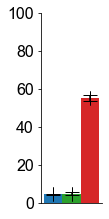

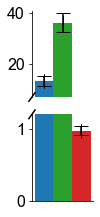

In [312]:
import numpy as np

m, n, k = 784, 1000, 26
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+26*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
                ])

letters_sgd_snn = np.array(letters_sgd_snn_cost) * np.array([1, 1/np.sqrt(26)])
letters_ewc_snn = np.array(letters_ewc_snn_cost) * np.array([1, 1/np.sqrt(26)])
letters_edf_snn = np.array(letters_naca_snn_cost) * np.array([1, 1/np.sqrt(26)])

letters_sgd_ann = np.array(letters_sgd_ann_cost) * np.array([1, 1/np.sqrt(26)])
letters_ewc_ann = np.array(letters_ewc_ann_cost) * np.array([1, 1/np.sqrt(26)])
letters_edf_ann = np.array(letters_naca_ann_cost) * np.array([1, 1/np.sqrt(26)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[letters_sgd_ann_acc[0], letters_ewc_ann_acc[0], letters_naca_ann_acc[0]],
          [letters_sgd_ann_acc[1], letters_ewc_ann_acc[1], letters_naca_ann_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.2, 0, 0+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
plt.ylim(0,100)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('letters_ann_增量学习能耗_1.svg')

fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
plt.rcParams['font.size'] = 16
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
d = .05  
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs)  
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)
x = np.array([[letters_sgd_ann[0], letters_ewc_ann[0], letters_edf_ann[0]],
          [letters_sgd_ann[1], letters_ewc_ann[1], letters_edf_ann[1]]]) * cost /1e6
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([7,41])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,1.2])
plt.xticks(())

plt.savefig('letters_ann_增量学习能耗_2.svg')
plt.show()

## mathgreek

### SNN

[[2.15913046e+00 2.16608696e+00 4.05106872e+01]
 [2.13906500e-02 3.46035792e-02 2.75726354e+00]]


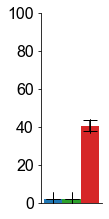

[[1.81419600e+00 4.29442560e+01 8.28400000e-02]
 [9.31319482e-02 2.20029462e+00 4.31833352e-03]]


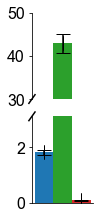

In [325]:
import numpy as np

m, n, k = 45*45, 3000, 46
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m + 46*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
                ])

mathgreek_sgd_snn = np.array(mathgreek_sgd_snn_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_ewc_snn = np.array(mathgreek_ewc_snn_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_edf_snn = np.array(mathgreek_naca_snn_cost) * np.array([1, 1/np.sqrt(46)])

mathgreek_sgd_ann = np.array(mathgreek_sgd_ann_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_ewc_ann = np.array(mathgreek_ewc_ann_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_edf_ann = np.array(mathgreek_naca_ann_cost) * np.array([1, 1/np.sqrt(46)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[mathgreek_sgd_snn_acc[0], mathgreek_ewc_snn_acc[0], mathgreek_naca_snn_acc[0]],
          [mathgreek_sgd_snn_acc[1], mathgreek_ewc_snn_acc[1], mathgreek_naca_snn_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.2, 0, 0+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
plt.ylim(0,100)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('mathgreek_snn_增量学习能耗_1.svg')
plt.show()

plt.rcParams['font.size'] = 16
fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs)  
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)
x = np.array([[mathgreek_sgd_snn[0], mathgreek_ewc_snn[0], mathgreek_edf_snn[0]],
          [mathgreek_sgd_snn[1], mathgreek_ewc_snn[1], mathgreek_edf_snn[1]]]) * cost /1e8
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([30,50])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,3.1])
plt.xticks(())

plt.savefig('mathgreek_snn_增量学习能耗_2.svg')
plt.show()

### ANN

[[ 2.26356525  2.68169574 54.67360735]
 [ 0.06036414  0.16365456  2.01441836]]


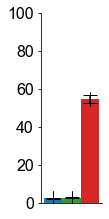

[[9.94080000e-01 3.45939840e+01 1.11834000e-01]
 [5.79365237e-02 1.95854930e+00 6.85514194e-03]]


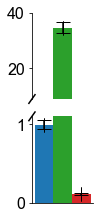

In [314]:
import numpy as np

m, n, k = 45*45, 3000, 46
cost = np.array([m*n+n*k+k*n+n*m,
            m*n+n*k+k*n+n*m+ 46*(m*n+n*k),
            max(m*n, k*m) + max(n*k, k*m),
                ])

mathgreek_sgd_snn = np.array(mathgreek_sgd_snn_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_ewc_snn = np.array(mathgreek_ewc_snn_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_edf_snn = np.array(mathgreek_naca_snn_cost) * np.array([1, 1/np.sqrt(46)])

mathgreek_sgd_ann = np.array(mathgreek_sgd_ann_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_ewc_ann = np.array(mathgreek_ewc_ann_cost) * np.array([1, 1/np.sqrt(46)])
mathgreek_edf_ann = np.array(mathgreek_naca_ann_cost) * np.array([1, 1/np.sqrt(46)])

fig, ax1 = plt.subplots(figsize=(2.6/2-0.2,3.5))
x = np.array([[mathgreek_sgd_ann_acc[0], mathgreek_ewc_ann_acc[0], mathgreek_naca_ann_acc[0]],
          [mathgreek_sgd_ann_acc[1], mathgreek_ewc_ann_acc[1], mathgreek_naca_ann_acc[1]]]) * 100
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax1.bar([0-0.2, 0, 0+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
plt.yticks(fontsize=16)
plt.xticks(())
plt.xticks(fontsize=16)
plt.ylim(0,100)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig('mathgreek_ann_增量学习能耗_1.svg')
plt.show()

fig, (ax2,ax3) = plt.subplots(2,1, sharex=True, figsize=(2.6/2-0.2,3.5))
plt.rcParams['font.size'] = 16
ax2.xaxis.tick_top()
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot(( - d,  + d), (-d, +d), **kwargs)  
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot(( - d,  + d), (1 - d, 1 + d), **kwargs)

x = np.array([[mathgreek_sgd_ann[0], mathgreek_ewc_ann[0], mathgreek_edf_ann[0]],
          [mathgreek_sgd_ann[1], mathgreek_ewc_ann[1], mathgreek_edf_ann[1]]]) * cost /1e8
print(x)
error_kw = {'capsize': 7, 'ecolor': 'black'}
ax2.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax2.set_ylim([9,40])
ax3.bar([1-0.2, 1, 1+0.2], x[0,:],yerr=x[1,:], xerr=0, width=0.2, color=['C0','C2','C3'], error_kw=error_kw)
ax3.set_ylim([0,1.1])
plt.xticks(())

plt.savefig('mathgreek_ann_增量学习能耗_2.svg')
plt.show()

# Analysis weights

## STDP

[0, 10, 20, 150]
D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_0_seed_5.npy
0.0 0.0
0.0 0.0


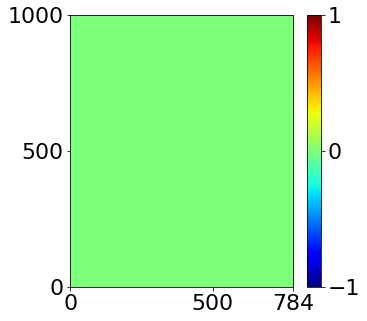

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 7.84001e+05 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

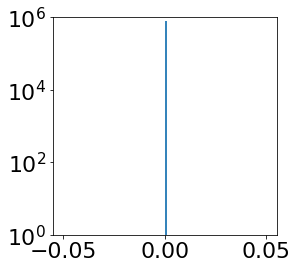

D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_10_seed_5.npy
0.05201827 -0.04810013
5.0 -4.810013


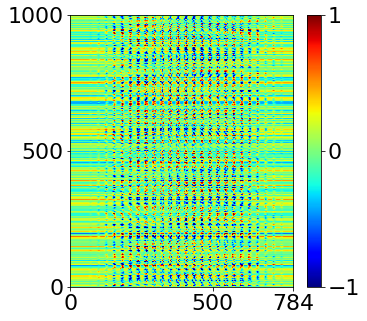

[1.0000e+00 2.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 5.0000e+00
 5.0000e+00 5.0000e+00 1.6000e+01 1.1000e+01 1.5000e+01 3.1000e+01
 4.3000e+01 6.3000e+01 6.4000e+01 7.6000e+01 1.1800e+02 1.6300e+02
 1.9600e+02 2.4500e+02 3.2700e+02 3.6200e+02 4.2900e+02 5.8200e+02
 7.1100e+02 9.3000e+02 1.1370e+03 1.3470e+03 1.5820e+03 1.8690e+03
 2.2090e+03 2.5420e+03 2.8200e+03 3.2190e+03 3.6650e+03 4.1700e+03
 4.7580e+03 5.2880e+03 6.1660e+03 7.1540e+03 1.0783e+04 1.5152e+04
 2.3316e+04 2.8462e+04 3.0966e+04 4.0471e+04 4.1630e+04 3.9099e+04
 4.6741e+04 5.0650e+04 5.2227e+04 4.9196e+04 4.8569e+04 4.8058e+04
 4.7018e+04 3.9231e+04 2.6995e+04 2.1230e+04 1.4102e+04 1.0573e+04
 6.4700e+03 5.6260e+03 4.8090e+03 4.2690e+03 3.8160e+03 3.3500e+03
 2.8210e+03 2.5370e+03 2.2410e+03 1.9000e+03 1.6650e+03 1.3640e+03
 1.2330e+03 1.0110e+03 7.9700e+02 7.5900e+02 5.6000e+02 4.7300e+02
 3.5300e+02 2.7200e+02 2.1800e+02 1.6700e+02 1.3700e+02 1.2800e+02
 7.7000e+01 6.2000e+01 4.2000e+01 3.4000e+01 2.3000e+01 2.6000

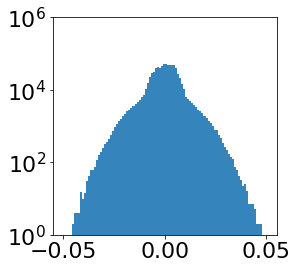

D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_20_seed_5.npy
0.07386589 -0.07747496
5.0 -5.0


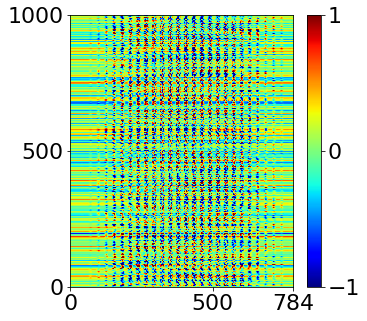

[  541.   102.   124.   139.   160.   187.   222.   235.   281.   331.
   373.   417.   526.   591.   657.   781.   814.   947.  1066.  1219.
  1460.  1478.  1672.  1846.  1984.  2233.  2545.  2731.  2945.  3258.
  3599.  3852.  4269.  4542.  4852.  5448.  5823.  7757. 10271. 12766.
 18497. 21286. 21534. 27869. 27042. 29391. 32995. 30898. 36777. 38160.
 37427. 41197. 36736. 35105. 37225. 31695. 32919. 23220. 21779. 18447.
 12340.  9180.  7361.  5643.  5136.  4589.  4111.  3938.  3699.  3278.
  3011.  2720.  2559.  2272.  2097.  2013.  1779.  1620.  1397.  1248.
  1109.   961.   869.   743.   691.   635.   537.   478.   384.   347.
   305.   264.   237.   166.   176.   147.   109.   111.    97.   500.]


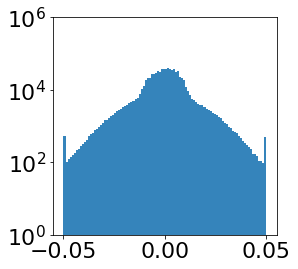

D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_150_seed_5.npy
0.20574595 -0.20242593
5.0 -5.0


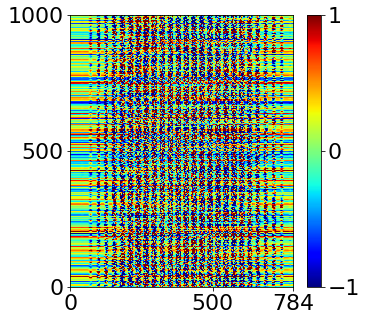

[39786.  1600.  1582.  1626.  1764.  1799.  1813.  1857.  1975.  1999.
  2102.  2029.  2233.  2296.  2370.  2477.  2611.  2696.  2889.  2907.
  2972.  3035.  3230.  3268.  3393.  3535.  3748.  3806.  4076.  4253.
  5465.  6199.  6894.  7087.  8910. 10645. 11491. 13355. 11502. 13202.
 14514. 15398. 14617. 17123. 18534. 18115. 18567. 18423. 18925. 17332.
 19430. 19179. 20455. 19373. 20263. 18979. 19014. 17313. 16318. 17244.
 14035. 14240. 11631. 13401. 11060.  8673.  8461.  7152.  5643.  4810.
  4597.  4129.  3975.  3806.  3588.  3449.  3252.  3263.  3112.  2873.
  2900.  2831.  2666.  2592.  2563.  2375.  2326.  2236.  2096.  2124.
  2047.  1848.  1912.  1799.  1768.  1709.  1609.  1526.  1474. 38956.]


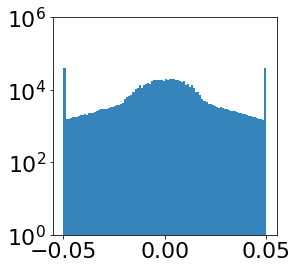

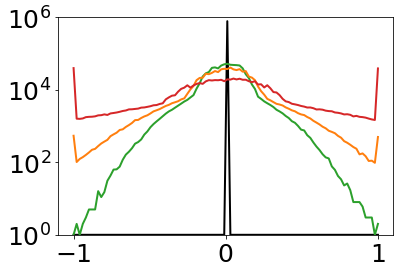

KeyError: 1

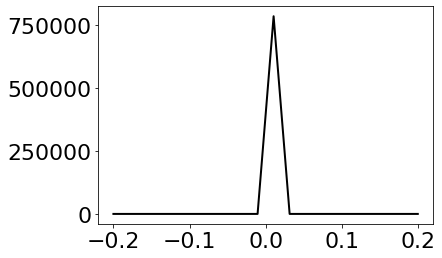

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 22})

dict_ = {}

li = [i for i in range(0,300,10)]
li.insert(1,1)
li.insert(2,2)
li=[0,10,20,150]
print(li)
for i in li:
    
    x = np.load('D:/code/EAST/data_new/naca/2/6/dstdp_ann_weight_t_0_seed_0_2.npy')
    a = np.load('D:/code/EAST/data_new/naca/2/6/dstdp_ann_weight_t_{}_seed_0_2.npy'.format(i)) - x
    
    print('D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_{}_seed_5.npy'.format(i))
    print(a.max(), a.min())
    a[a<-0.05]=-0.05
    a[a>0.05] = 0.05
    b=a*100
    fig,ax = plt.subplots(figsize=(5,5))
    print(b.max(), b.min())
    from matplotlib.colors import ListedColormap,LinearSegmentedColormap
    clist=['blue','yellow','red']
    newcmp = LinearSegmentedColormap.from_list('chaos',clist)
    plt.imshow(b, cmap='jet', vmin=-1, vmax=1, aspect='auto')
    c = plt.colorbar()
    c.set_ticks([-1,0,1])
    plt.yticks([0,500,1000])
    plt.xticks([0,500,784])
    ax.invert_yaxis()
    plt.savefig('STDP_ann_weight2_t_{}.svg'.format(i))
    plt.show()
    
    plt.figure(figsize=(4,4))
    nt, bins, patch = plt.hist(a.reshape(-1,), alpha=0.9,bins=100,color='C0',label='SGD', range=[-0.05, 0.05]) # ,range=[-1,1]
    nt = nt+1
    dict_[i] = [bins, nt] 
    plt.ylim([1,1e6])
    plt.yscale('log')

    print(nt)
#     plt.ylim(0,700)
    plt.savefig('stdp_bar_{}.svg'.format(i))
    plt.show()
    
from scipy import interpolate

plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[0]][1], color='k',linewidth=2, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[1]][1], color='C2',linewidth=2, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[2]][1], color='C1',linewidth=2, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[3]][1], color='C3',linewidth=2, label='2')

stdp_1 = dict_

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylim([1,1e6])
plt.yscale('log')
plt.xticks([-1,0,1])
plt.savefig('stdp_curve.svg')
plt.show()

plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[0][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='k',linewidth=2, label='2')
plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[1][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='C2',linewidth=2, label='2')
plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[3][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='C1',linewidth=2, label='2')
plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[9][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='C3',linewidth=2, label='2')


plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.yscale('log')
plt.ylim([1e4,1e5])
plt.xticks([-0.2,0,0.2])
plt.savefig('stdp_curve_1.svg')
plt.show()

plt.show()

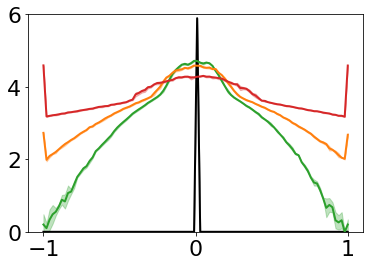

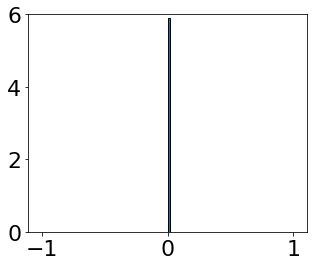

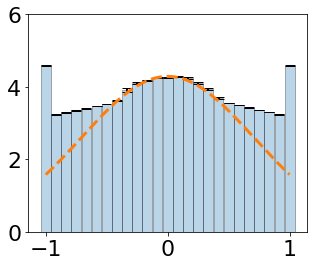

In [140]:
dict_ = {}
std_dict_ = {}
li = [0,10,20,150]
for i in li:
    dict_[i] = (np.log10(stdp_1[i][1]) + np.log10(stdp_2[i][1]) + np.log10(stdp_3[i][1]))/3
    std_dict_[i] = np.zeros((3, 100))
    std_dict_[i][0] = np.log10(stdp_1[i][1])
    std_dict_[i][1] = np.log10(stdp_2[i][1])
    std_dict_[i][2] = np.log10(stdp_3[i][1])

plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[0]], color='k',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[0]] - std_dict_[li[0]].std(0), 
                 dict_[li[0]] + std_dict_[li[0]].std(0), alpha=.3, color='k')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[1]], color='C2',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[1]] - std_dict_[li[1]].std(0), 
                 dict_[li[1]] + std_dict_[li[1]].std(0), alpha=.3, color='C2')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[2]], color='C1',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[2]] - std_dict_[li[2]].std(0), 
                 dict_[li[2]] + std_dict_[li[2]].std(0), alpha=.3, color='C1')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[3]], color='C3',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[3]] - std_dict_[li[3]].std(0), 
                 dict_[li[3]] + std_dict_[li[3]].std(0), alpha=.3, color='C3')
# plt.yscale('log')
plt.ylim([0,6])
plt.xticks([-1,0,1])
plt.savefig('stdp_curve.svg')
plt.show()

plt.figure(figsize=(5,4))
plt.bar(np.linspace(-1,1,100),height=dict_[li[0]], width=0.02, edgecolor='k', color='C0')
plt.ylim(0,6)
plt.savefig('init_bar.svg'.format(i))
plt.show()

plt.figure(figsize=(5,4))
bars = np.linspace(0,99,25).astype('int')
plt.bar(np.linspace(-1,1,25),height=dict_[li[3]][bars], yerr=std_dict_[li[3]].std(0)[bars], error_kw={'elinewidth':2,'capsize':5},
        width=0.08, edgecolor='k', color='C0', alpha=.3)
plt.ylim(0,6)

x = np.arange(-1, 1, 0.001)
# 因变量（不同均值或方差）
y = gd(x, 0, 0.5) * 7.6
plt.plot(x,y,linestyle='--',linewidth=3)

plt.savefig('stdp_bar.pdf'.format(i))
plt.show()

## NACA

[0, 10, 20, 150]
D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_0_seed_5.npy
0.0 0.0
0.0 0.0


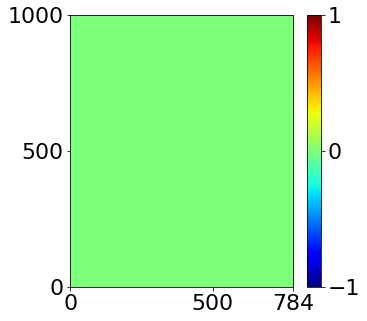

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 7.84001e+05 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

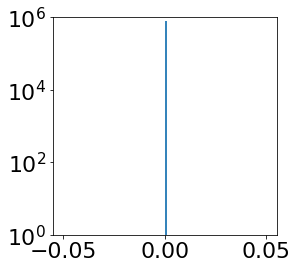

D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_10_seed_5.npy
0.0042754374 -0.0044521615
0.8550875 -0.8904323


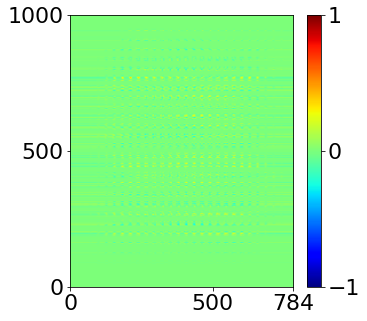

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.20000e+01 8.90000e+01 1.01200e+03
 8.75500e+03 1.98228e+05 5.66262e+05 8.48400e+03 1.05300e+03 1.05000e+02
 1.00000e+01 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

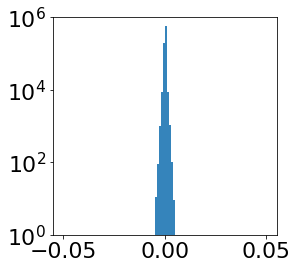

D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_20_seed_5.npy
0.008385628 -0.00836169
1.6771257 -1.672338


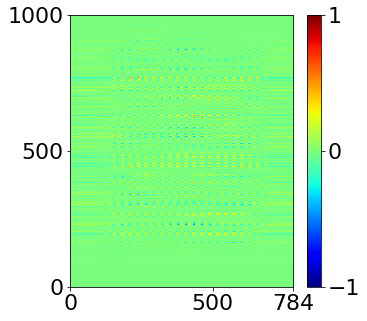

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 6.00000e+00
 1.60000e+01 6.90000e+01 1.89000e+02 7.44000e+02 2.20900e+03 6.37500e+03
 2.98990e+04 1.71188e+05 5.36035e+05 2.76770e+04 6.29100e+03 2.19500e+03
 8.16000e+02 2.13000e+02 6.50000e+01 2.50000e+01 6.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

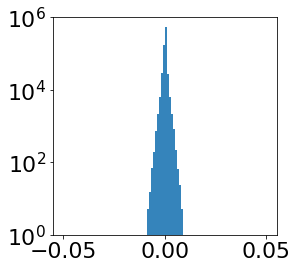

D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_150_seed_5.npy
0.046794202 -0.036893766
9.35884 -7.378753


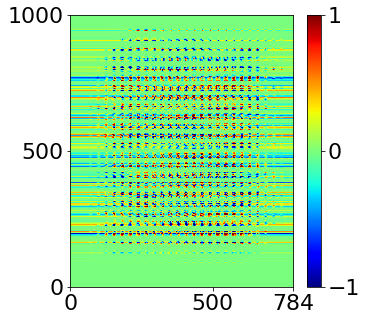

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 2.00000e+00 3.00000e+00 3.00000e+00 5.00000e+00 9.00000e+00
 1.50000e+01 1.60000e+01 2.10000e+01 3.10000e+01 4.40000e+01 3.90000e+01
 6.40000e+01 9.90000e+01 1.21000e+02 1.63000e+02 2.16000e+02 2.51000e+02
 3.65000e+02 4.56000e+02 5.62000e+02 7.09000e+02 8.98000e+02 1.10700e+03
 1.37600e+03 1.70400e+03 2.03100e+03 2.42500e+03 2.97400e+03 4.12900e+03
 6.22300e+03 1.01210e+04 1.40100e+04 1.26750e+04 1.79010e+04 3.06540e+04
 3.85960e+04 7.14040e+04 4.05063e+05 4.18090e+04 3.08380e+04 2.49020e+04
 1.46200e+04 1.17640e+04 7.39300e+03 5.59600e+03 4.47900e+03 2.82800e+03
 2.46900e+03 2.07500e+03 1.64200e+03 1.37700e+03 1.07400e+03 9.21000e+02
 7.37000e+02 6.48000e+02 5.09000e+02 4.49000e+02 3.37000e+02 2.57000e+02
 2.18000e+02 1.75000e+02 1.21000e+02 9.90000e+01 8.70000e+01 4.60000e+01
 4.10000e+01 1.80000e+01 2.00000e+01 1.20000e+01 7.

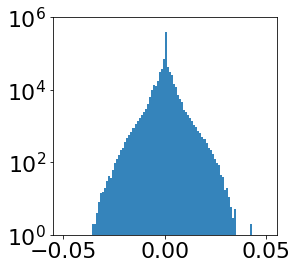

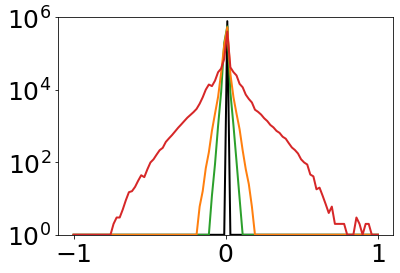

KeyError: 1

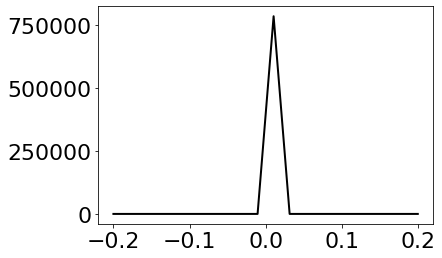

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 22})

dict_ = {}

li = [i for i in range(0,300,10)]
li.insert(1,1)
li.insert(2,2)
li=[0,10,20,150]
print(li)
for i in li:
    x = np.load('D:/code/EAST/data_new/naca/2/6/naca_ann_weight_t_r10_seed_0_mask.npy')
    a = np.load('D:/code/EAST/data_new/naca/2/6/naca_ann_weight_t_r1{}_seed_0_mask.npy'.format(i)) - x
    
    print('D:/code/EAST/data_new/naca/2/dstdp_ann_weight_t_{}_seed_5.npy'.format(i))
    print(a.max(), a.min())
    a[a<-0.05]=-0.05
    a[a>0.05] = 0.05
    b=a*200
    fig, ax = plt.subplots(figsize=(5,5))
    print(b.max(), b.min())
    from matplotlib.colors import ListedColormap,LinearSegmentedColormap
    clist=['blue','yellow','red']
    newcmp = LinearSegmentedColormap.from_list('chaos',clist)
    plt.imshow(b, cmap='jet', vmin=-1, vmax=1, aspect='auto')
    c = plt.colorbar()
    c.set_ticks([-1,0,1])
    plt.yticks([0,500,1000])
    plt.xticks([0,500,784])
    ax.invert_yaxis()
    plt.savefig('naca_ann_weight2_t_{}.svg'.format(i))
    plt.show()
    
    plt.figure(figsize=(4,4))
    nt, bins, patch = plt.hist(a.reshape(-1,), alpha=0.9,bins=100,color='C0',label='SGD', range=[-0.05, 0.05]) # ,range=[-1,1]
    nt = nt+1
    dict_[i] = [bins, nt] 
    plt.ylim([1,1e6])
    plt.yscale('log')

    print(nt)
    plt.savefig('stdp_bar_{}.svg'.format(i))
    plt.show()
    
from scipy import interpolate

# plt.figure(figsize=(4,4))
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[0]][1], color='k',linewidth=2, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[1]][1], color='C2',linewidth=2, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[2]][1], color='C1',linewidth=2, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[3]][1], color='C3',linewidth=2, label='2')

naca_1 = dict_

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylim([1,1e6])
plt.yscale('log')
plt.xticks([-1,0,1])
plt.savefig('stdp_curve.svg')
plt.show()

plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[0][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='k',linewidth=2, label='2')
plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[1][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='C2',linewidth=2, label='2')
plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[3][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='C1',linewidth=2, label='2')
plt.plot(np.linspace(-0.2,0.2, len(dict_[0][1])//5), dict_[9][1][4*len(dict_[0][1])//10:6*len(dict_[0][1])//10], color='C3',linewidth=2, label='2')


plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.yscale('log')
plt.ylim([1e4,1e5])
plt.xticks([-0.2,0,0.2])
plt.savefig('stdp_curve_1.svg')
plt.show()
plt.show()

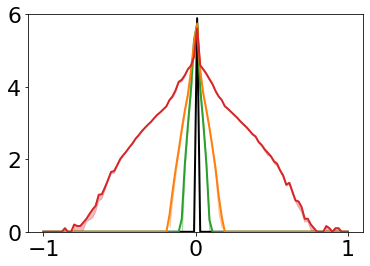

[ 0  4  8 12 16 20 24 28 33 37 41 45 50 53 57 61 66 70 74 78 82 86 90 94
 99]
[0.         0.         0.         0.22491712 0.22990812 0.08522794
 0.02837947 0.00431084 0.01513073 0.0132617  0.01421963 0.06732233
 0.00244787 0.02867916 0.01913069 0.00462226 0.02302104 0.03425729
 0.01024581 0.04971381 0.02733767 0.08301022 0.         0.
 0.        ]
(array([50], dtype=int64),)


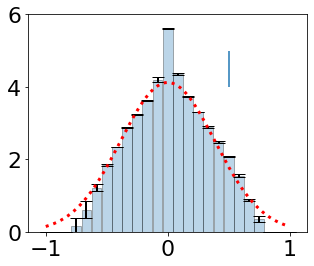

In [144]:
dict_ = {}
std_dict_ = {}
li = [0,10,20,150]
def gd(x, mu=0, sigma=1):
    left = 1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma))
    right = np.exp(-(x - mu)**2 / (2 * sigma))
    return left * right

for i in li:
    dict_[i] = (np.log10(naca_1[i][1]) + np.log10(naca_2[i][1]) + np.log10(naca_3[i][1]))/3
    std_dict_[i] = np.zeros((3, 100))
    std_dict_[i][0] = np.log10(naca_1[i][1])
    std_dict_[i][1] = np.log10(naca_2[i][1])
    std_dict_[i][2] = np.log10(naca_3[i][1])

plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[0]], color='k',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[0]], dict_[li[0]] - std_dict_[li[0]].std(0), 
                 dict_[li[0]] + std_dict_[li[0]].std(0), alpha=.3, color='k')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[1]], color='C2',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[1]], dict_[li[1]] - std_dict_[li[1]].std(0), 
                 dict_[li[1]] + std_dict_[li[1]].std(0), alpha=.3, color='C2')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[2]], color='C1',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[2]], dict_[li[2]] - std_dict_[li[2]].std(0), 
                 dict_[li[2]] + std_dict_[li[2]].std(0), alpha=.3, color='C1')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[3]], color='C3',linewidth=2, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[3]], dict_[li[3]] - std_dict_[li[3]].std(0), 
                 dict_[li[3]] + std_dict_[li[3]].std(0), alpha=.3, color='C3')
# plt.yscale('log')
plt.ylim([0,6])
plt.xticks([-1,0,1])
plt.savefig('naca_curve.svg')
plt.show()

plt.figure(figsize=(5,4))
bars = np.linspace(0,99,25).astype('int')
bars[12]=50
plt.bar(np.linspace(-1,1,25),height=dict_[li[3]][bars], yerr=std_dict_[li[3]].std(0)[bars], error_kw={'elinewidth':2,'capsize':6},
        width=0.08, edgecolor='k', color='C0', alpha=.3)
print(bars)
print(std_dict_[li[3]].std(0)[bars])
print(np.where(dict_[li[3]]==dict_[li[3]].max()))
plt.ylim(0,6)
plt.vlines(0.5,4,5)


x = np.arange(-1, 1, 0.001)
y = gd(x, 0, 0.15) * 4

plt.plot(x,y,linestyle=':',linewidth=3,color='r')
plt.savefig('naca_bar.svg'.format(i))
plt.show()

## SGD

0.0 0.0


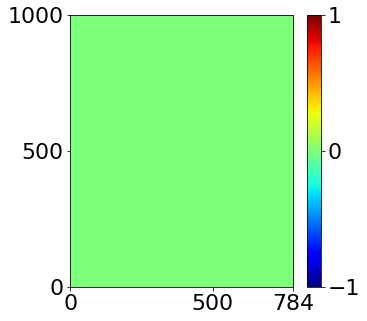

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 7.84001e+05 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

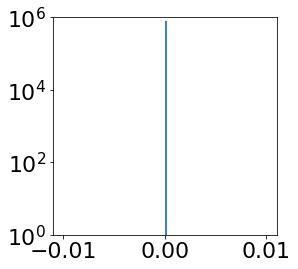

0.00093827397 -0.00091423094


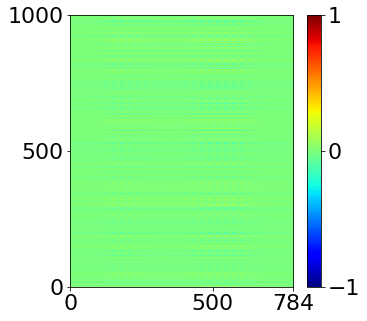

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.33000e+02 3.65800e+03 1.43140e+04
 4.40230e+04 3.43133e+05 3.22661e+05 4.02540e+04 1.31950e+04 2.55000e+03
 8.90000e+01 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

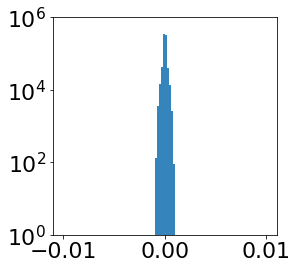

0.00091421977 -0.0024848208


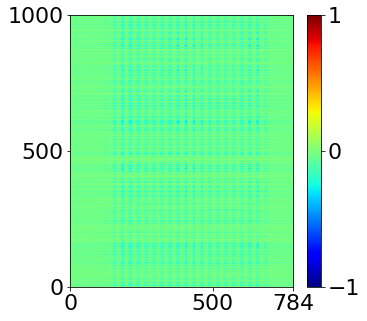

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 4.00000e+00 1.90000e+01 6.80000e+01 1.70000e+02 5.50000e+02
 1.77700e+03 4.34200e+03 9.12000e+03 1.60290e+04 2.60720e+04 4.44780e+04
 1.60733e+05 3.95175e+05 1.17396e+05 7.19500e+03 7.63000e+02 1.13000e+02
 1.40000e+01 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

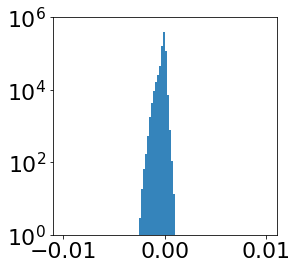

0.002051726 -0.007316295


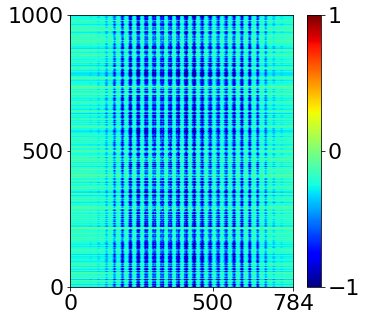

[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 2.0000e+00 5.0000e+00 7.0000e+00 1.2000e+01 2.7000e+01
 5.1000e+01 9.1000e+01 1.5500e+02 3.3100e+02 4.7500e+02 7.9100e+02
 1.1880e+03 1.7090e+03 2.2910e+03 3.0870e+03 3.8200e+03 4.7930e+03
 5.7060e+03 6.7000e+03 7.9460e+03 9.0020e+03 9.8970e+03 1.1012e+04
 1.2025e+04 1.3361e+04 1.4616e+04 1.6662e+04 1.8749e+04 2.2257e+04
 3.1157e+04 6.1943e+04 8.9804e+04 9.3179e+04 8.3571e+04 8.1989e+04
 7.7124e+04 7.1189e+04 2.3480e+04 2.6070e+03 8.6700e+02 2.3700e+02
 1.0000e+02 1.1000e+01 9.0000e+00 4.0000e+00 5.0000e+00 1.0000e+00
 3.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000

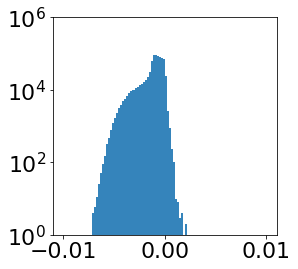

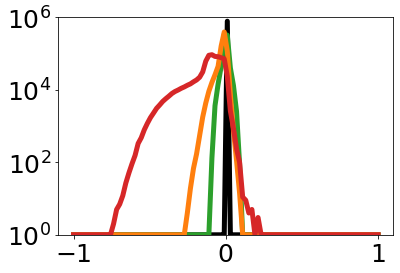

In [80]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 22})

dict_ = {}
li = [0,1,2,9]
for i in li:
    x = np.load('D:/code/EAST/data_new/naca/2/6/sgd_ann_weight0_t_0_copy.npy')
    a = np.load('D:/code/EAST/data_new/naca/2/6/sgd_ann_weight0_t_{}_copy.npy'.format(i)) - x
    print(a.max(), a.min())
    b = 300* a
    fig, ax = plt.subplots(figsize=(5,5))
    from matplotlib.colors import ListedColormap,LinearSegmentedColormap
    clist=['blue','yellow','red']
    newcmp = LinearSegmentedColormap.from_list('chaos',clist)
    plt.imshow(b, cmap='jet', vmin=-1, vmax=1, aspect='auto')
    c = plt.colorbar()
    c.set_ticks([-1,0,1])
    plt.yticks([0,500,1000])
    plt.xticks([0,500,784])
    ax.invert_yaxis()
    plt.savefig('sgd_ann_weight2_t_{}.svg'.format(i))
    plt.show()
    
    plt.figure(figsize=(4,4))
    nt, bins, patch = plt.hist(a.reshape(-1,), alpha=0.9,bins=100,color='C0',label='SGD',range=[-0.01,0.01]) # 
    plt.yscale("log")
    plt.ylim([1,1e6])
    nt = nt+1
    dict_[i] = [bins[:-1], nt] 
    print(nt)
    plt.savefig('naca_bar_{}.svg'.format(i))
    plt.show()

    
from scipy import interpolate

plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[0]][1], color='k',linewidth=5, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[1]][1], color='C2',linewidth=5, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[2]][1], color='C1',linewidth=5, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[3]][1], color='C3',linewidth=5, label='2')

sgd_1 = dict_

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.yscale('log')
plt.ylim([1,1e6])
plt.xticks([-1,0,1])
plt.savefig('sgd_curve.svg')
plt.show()


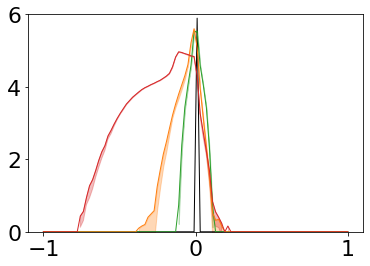

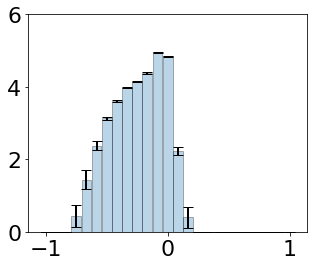

In [84]:
dict_ = {}
std_dict_ = {}
li = [0,1,2,9]
for i in li:
    dict_[i] = (np.log10(sgd_1[i][1]) + np.log10(sgd_2[i][1]) + np.log10(sgd_3[i][1]))/3
    std_dict_[i] = np.zeros((3, 100))
    std_dict_[i][0] = np.log10(sgd_1[i][1])
    std_dict_[i][1] = np.log10(sgd_2[i][1])
    std_dict_[i][2] = np.log10(sgd_3[i][1])

plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[0]], color='k',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[0]], dict_[li[0]] - std_dict_[li[0]].std(0), 
                 dict_[li[0]] + std_dict_[li[0]].std(0), alpha=.3, color='k')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[1]], color='C2',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[1]], dict_[li[1]] - std_dict_[li[1]].std(0), 
                 dict_[li[1]] + std_dict_[li[1]].std(0), alpha=.3, color='C2')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[2]], color='C1',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[2]], dict_[li[2]] - std_dict_[li[2]].std(0), 
                 dict_[li[2]] + std_dict_[li[2]].std(0), alpha=.3, color='C1')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[3]], color='C3',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[3]], dict_[li[3]] - std_dict_[li[3]].std(0), 
                 dict_[li[3]] + std_dict_[li[3]].std(0), alpha=.3, color='C3')
# plt.yscale('log')
plt.ylim([0,6])
plt.xticks([-1,0,1])
plt.savefig('sgd_curve.svg')
plt.show()

plt.figure(figsize=(5,4))
bars = np.linspace(0,99,25).astype('int')
plt.bar(np.linspace(-1,1,25),height=dict_[li[3]][bars], yerr=std_dict_[li[3]].std(0)[bars], error_kw={'elinewidth':2,'capsize':5},
        width=0.08, edgecolor='k', color='C0', alpha=.3)
plt.ylim(0,6)
plt.savefig('sgd_bar.svg'.format(i))
plt.show()

## EWC

0.0 0.0
0.0


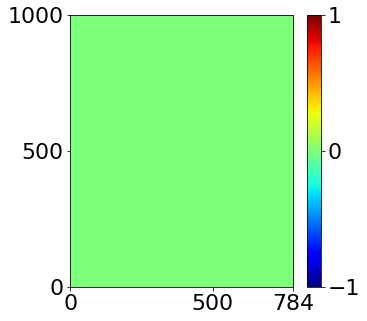

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 7.84001e+05 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

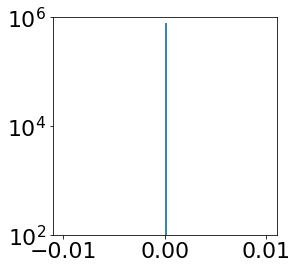

0.0010219142 -0.0010776832
0.30657426


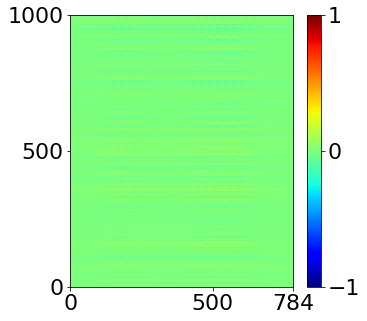

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.40000e+01 1.98000e+02 2.58600e+03 1.14100e+04
 3.85080e+04 3.51035e+05 3.24996e+05 3.87650e+04 1.21010e+04 3.83600e+03
 5.60000e+02 3.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

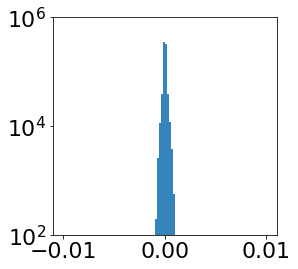

0.0009514466 -0.0027154163
0.28543398


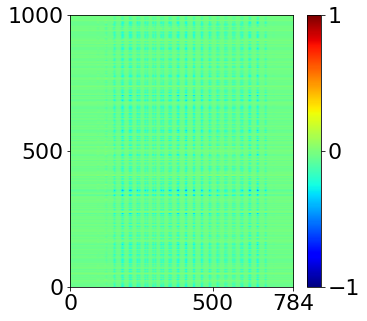

[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 8.00000e+00 1.30000e+01 3.50000e+01 1.01000e+02 2.19000e+02 5.79000e+02
 1.62500e+03 3.78300e+03 7.85600e+03 1.52760e+04 2.63540e+04 4.53490e+04
 1.48991e+05 3.93330e+05 1.31329e+05 7.78800e+03 1.17400e+03 1.78000e+02
 3.10000e+01 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.

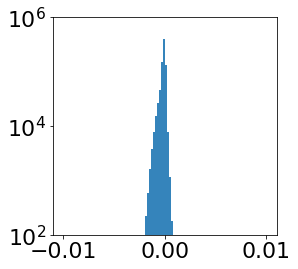

0.002259856 -0.011293367
0.6779568


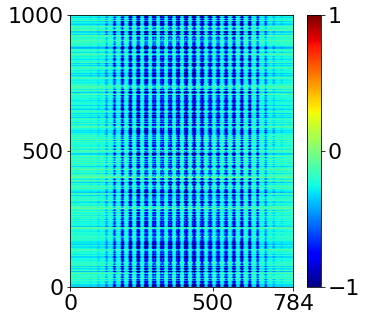

[1.1000e+01 1.3000e+01 9.0000e+00 1.1000e+01 1.9000e+01 3.5000e+01
 2.8000e+01 3.3000e+01 4.2000e+01 6.1000e+01 7.3000e+01 7.9000e+01
 8.7000e+01 1.0800e+02 1.7600e+02 2.4300e+02 3.0800e+02 3.3800e+02
 5.3000e+02 6.9200e+02 1.0580e+03 1.3030e+03 1.6730e+03 2.0960e+03
 2.6700e+03 3.3020e+03 4.1160e+03 4.9660e+03 5.6920e+03 6.3210e+03
 6.9040e+03 7.7960e+03 8.3310e+03 9.1560e+03 9.9430e+03 1.0830e+04
 1.1694e+04 1.2974e+04 1.4249e+04 1.5863e+04 2.0438e+04 2.9821e+04
 4.7152e+04 6.2934e+04 7.4161e+04 7.6245e+04 6.9595e+04 7.1944e+04
 6.6410e+04 7.3197e+04 3.2116e+04 7.3770e+03 3.5920e+03 2.2680e+03
 1.2580e+03 6.8100e+02 5.0500e+02 2.9200e+02 1.3800e+02 4.4000e+01
 1.7000e+01 7.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000

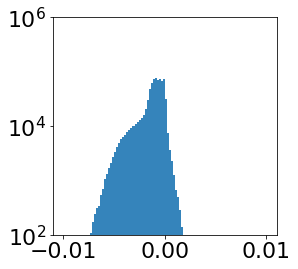

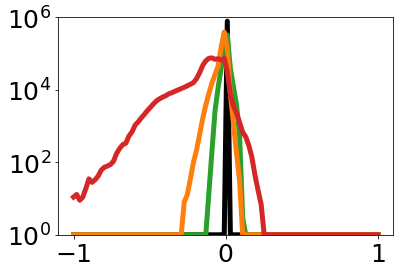

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 22})

dict_ = {}
li = [0,1,2,9]
for i in li:
    x = np.load('D:/code/EAST/data_new/naca/2/6/ewc_ann_weight_t_0_seeds_0.npy')
    a = np.load('D:/code/EAST/data_new/naca/2/6/ewc_ann_weight_t_{}_seeds_0.npy'.format(i)) - x
    print(a.max(), a.min())

    a[a>0.05]=0.05
    a[a<-0.05]=-0.05
    b = 300* a
    print(b.max())
    fig, ax = plt.subplots(figsize=(5,5))
    from matplotlib.colors import ListedColormap,LinearSegmentedColormap
    clist=['blue','yellow','red']
    newcmp = LinearSegmentedColormap.from_list('chaos',clist)
    plt.imshow(b, cmap='jet', vmin=-1, vmax=1, aspect='auto')
    c = plt.colorbar()
    c.set_ticks([-1,0,1])
    plt.yticks([0,500,1000])
    plt.xticks([0,500,784])
    ax.invert_yaxis()
    plt.savefig('ewc_ann_weight2_t_{}.svg'.format(i))
    plt.show()
    
    plt.figure(figsize=(4,4))
    nt, bins, patch = plt.hist(a.reshape(-1,), alpha=0.9,bins=100,color='C0',label='SGD',range=[-0.01,0.01]) # 
    plt.yscale("log")
    plt.ylim([1e2,1e6])
    nt = nt+1
    dict_[i] = [bins[:-1], nt] 
    print(nt)
    plt.savefig('ewc_bar_{}.svg'.format(i))
    plt.show()
    
from scipy import interpolate

plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[0]][1], color='k',linewidth=5, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[1]][1], color='C2',linewidth=5, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[2]][1], color='C1',linewidth=5, label='2')
plt.plot(np.linspace(-1,1, len(dict_[0][1])), dict_[li[3]][1], color='C3',linewidth=5, label='2')

ewc_1 = dict_

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.yscale('log')
plt.ylim([1,1e6])
plt.xticks([-1,0,1])
plt.savefig('ewc_curve.svg')
plt.show()

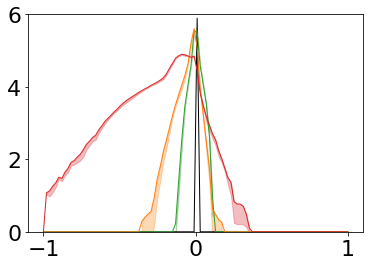

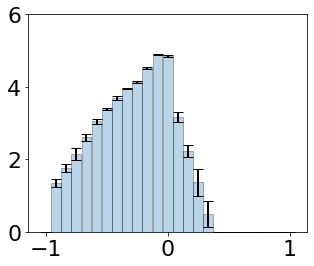

In [85]:
dict_ = {}
std_dict_ = {}
li = [0,1,2,9]
for i in li:
    ewc_1[i][1][0]=1
    ewc_2[i][1][0]=1
    ewc_3[i][1][0]=1
    dict_[i] = (np.log10(ewc_1[i][1]) + np.log10(ewc_2[i][1]) + np.log10(ewc_3[i][1]))/3
    std_dict_[i] = np.zeros((3, 100))
    std_dict_[i][0] = np.log10(ewc_1[i][1])
    std_dict_[i][1] = np.log10(ewc_2[i][1])
    std_dict_[i][2] = np.log10(ewc_3[i][1])

plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[0]], color='k',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[0]], dict_[li[0]] - std_dict_[li[0]].std(0), 
                 dict_[li[0]] + std_dict_[li[0]].std(0), alpha=.3, color='k')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[1]], color='C2',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[1]], dict_[li[1]] - std_dict_[li[1]].std(0), 
                 dict_[li[1]] + std_dict_[li[1]].std(0), alpha=.3, color='C2')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[2]], color='C1',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[2]], dict_[li[2]] - std_dict_[li[2]].std(0), 
                 dict_[li[2]] + std_dict_[li[2]].std(0), alpha=.3, color='C1')
plt.plot(np.linspace(-1,1, len(dict_[0])), dict_[li[3]], color='C3',linewidth=1, label='2')
plt.fill_between(np.linspace(-1,1, len(dict_[0])), dict_[li[3]], dict_[li[3]] - std_dict_[li[3]].std(0), 
                 dict_[li[3]] + std_dict_[li[3]].std(0), alpha=.3, color='C3')
# plt.yscale('log')
plt.ylim([0,6])
plt.xticks([-1,0,1])
plt.savefig('ewc_curve.svg')
plt.show()

plt.figure(figsize=(5,4))
bars = np.linspace(0,99,25).astype('int')
plt.bar(np.linspace(-1,1,25),height=dict_[li[3]][bars], yerr=std_dict_[li[3]].std(0)[bars], error_kw={'elinewidth':2,'capsize':5},
        width=0.08, edgecolor='k', color='C0', alpha=.3)
plt.ylim(0,6)
plt.savefig('ewc_bar.svg'.format(i))
plt.show()